

*   Name: Devin Augustin
*   NIM: 2440094352






In [1]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [2]:
!kaggle datasets download -d mohidabdulrehman/laptop-price-dataset

laptop-price-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
!unzip laptop-price-dataset.zip

Archive:  laptop-price-dataset.zip
replace laptop_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: laptop_data.csv         


In [4]:
# Data wrangling
import pandas as pd
import numpy as np

# for Visulization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

In [225]:
df = pd.read_csv("/content/laptop_data.csv")

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


Since we have a lot of object type, we need to turn them into float or int  value so we can use them for regression to predict the laptop's price.

In [227]:
df.drop(columns = ['Unnamed: 0'],inplace = True)

In [228]:
df.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [229]:
# Removing the GB string form Ram column
df['Ram'] = df['Ram'].str.replace('GB', '')

## Removing the KG string form weight column
df['Weight'] = df['Weight'].str.replace('kg', '')

# Changing the dtype of column - Ram and Weight Column
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [230]:
df.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


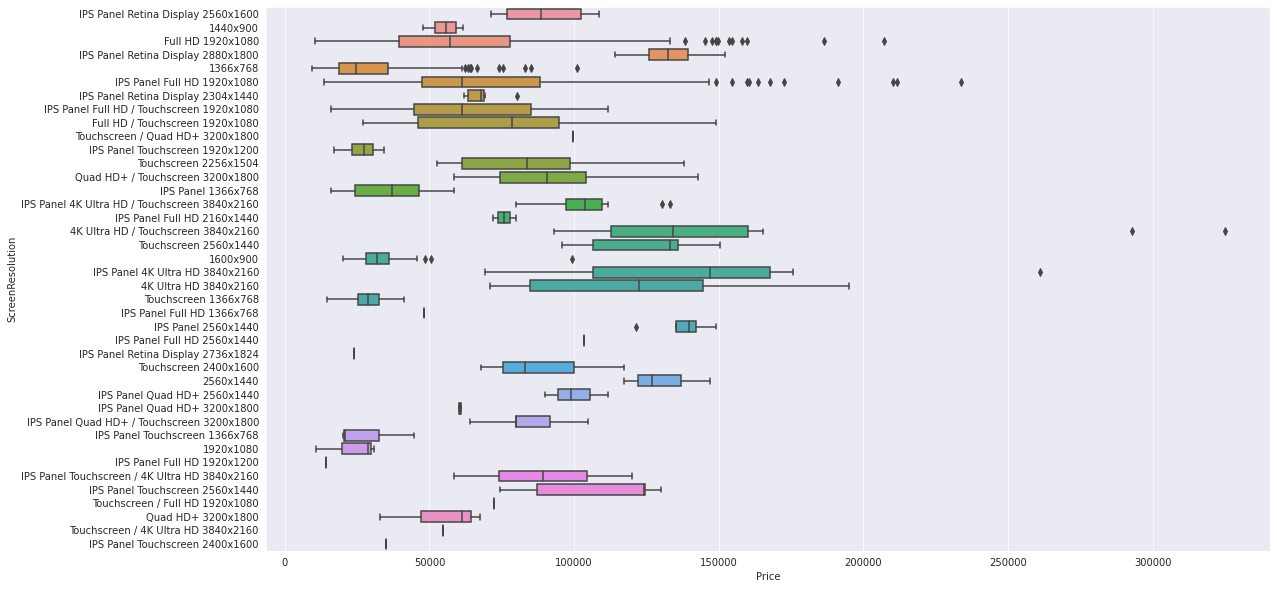

In [231]:
plt.figure(figsize = (18,10))
sns.boxplot(x = df["Price"], y = df["ScreenResolution"])
plt.show()

In [232]:
# Fetching touchscreen data from screenresolution column
df['touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if "Touchscreen" in x else 0)

# Fetching if Ips pannel is present in Screenresolution and storing it in new column
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

#Fetching x resolution & y resolution from the screen resolution column
res = df['ScreenResolution'].str.split('x', n =1, expand = True)
df['X_res'] = res[0]
df['Y_res'] = res[1]
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

#Calculate the pixel per inch
df['ppi'] = (((df['X_res'] **2) + (df['Y_res'] **2)) **0.5) / df['Inches'].astype('float')

In [233]:
df.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,Ips,X_res,Y_res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [234]:
#After we get the ppi, we can drop the X_res, Y_res., resolutions, and screen size (inches)
df.drop(columns = ['X_res', 'Y_res', 'Inches', 'ScreenResolution'], inplace = True)

In [235]:
df.head(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


Let's split the CPU categories into a smaller one.

In [236]:
df['CpuName'] = df['Cpu'].apply(lambda x :" " .join(x.split()[:3]))

In [237]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [238]:
df['Cpu brand'] = df['CpuName'].apply(fetch_processor)

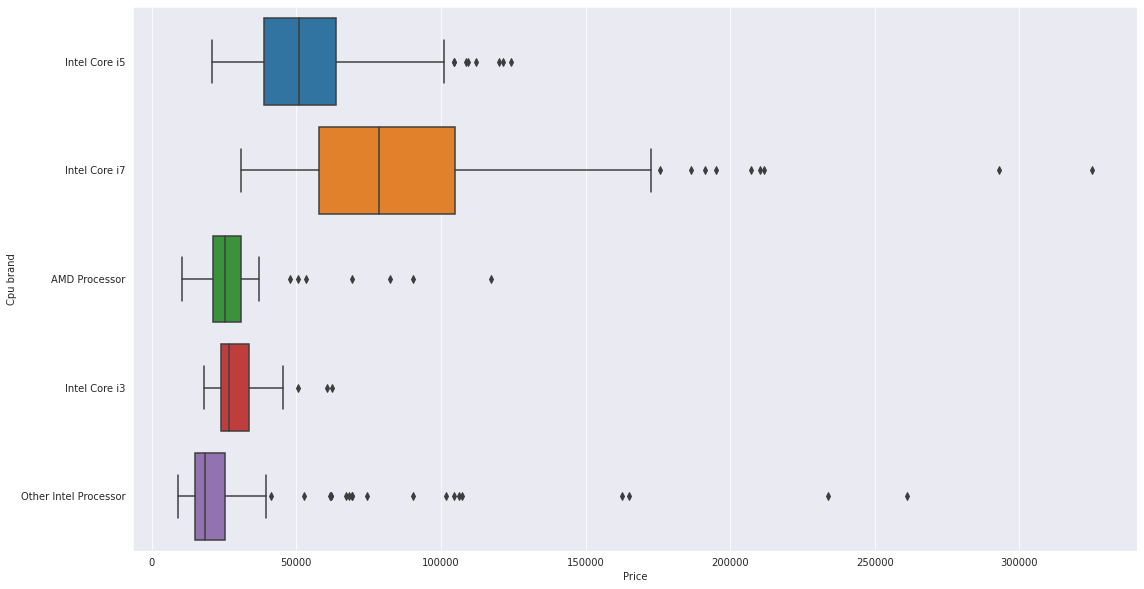

In [239]:
plt.figure(figsize = (18,10))
sns.boxplot(x = df["Price"], y = df["Cpu brand"])
plt.show()

In [240]:
df.head(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,Ips,ppi,CpuName,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


In [241]:
df.drop(columns = ['Cpu', 'CpuName'], inplace = True)

In [242]:
df.head(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,Ips,ppi,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


Let's split Memory column into HDD and SSD.

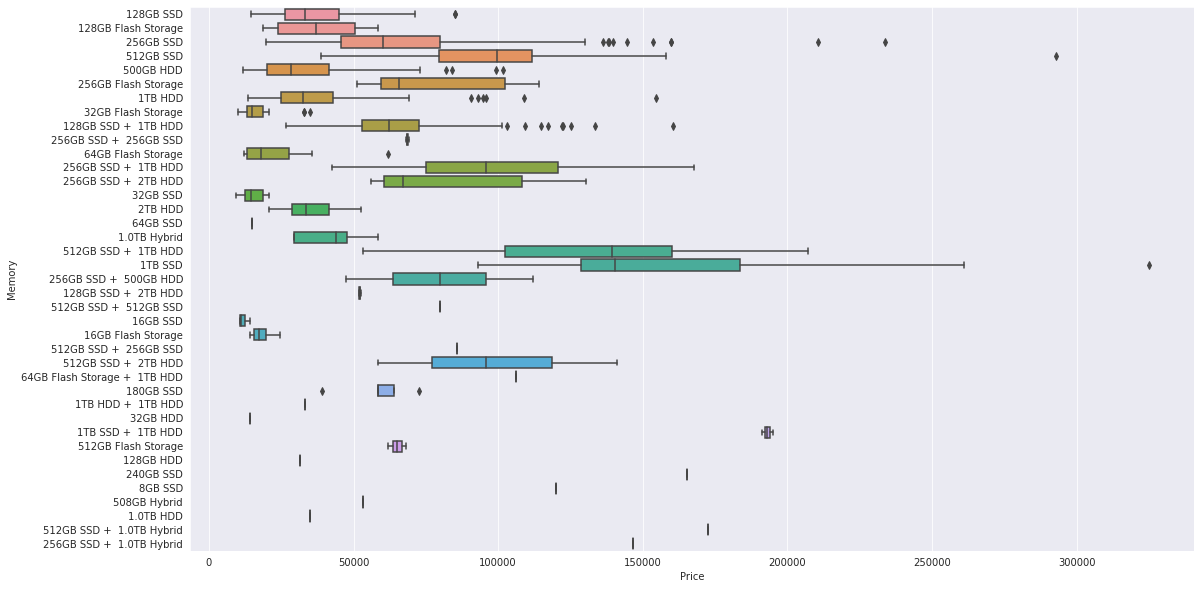

In [243]:
plt.figure(figsize = (18,10))
sns.boxplot(x = df["Price"], y = df["Memory"])
plt.show()

In [244]:
# We gonna only fetch SDD and HDD into new column from Memory
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex = True)

#Replacing GB to ''(null or empty)
df['Memory'] = df['Memory'].str.replace('GB', '')

#Replacing TB to 000 (1TB = 1000GB)
df['Memory'] = df['Memory'].str.replace('TB', '000')

In [245]:
new = df['Memory'].str.split('+', n=1, expand =True)

In [246]:
new.value_counts()

0                  1            
128 SSD              1000 HDD       94
256 SSD              1000 HDD       73
512 SSD              1000 HDD       14
256 SSD              2000 HDD       10
512 SSD              2000 HDD        3
1000 SSD             1000 HDD        2
128 SSD              2000 HDD        2
256 SSD              256 SSD         2
                     500 HDD         2
1000 HDD             1000 HDD        1
256 SSD              1000 Hybrid     1
512 SSD              1000 Hybrid     1
                     256 SSD         1
                     512 SSD         1
64 Flash Storage     1000 HDD        1
dtype: int64

In [247]:
df['first'] = new[0]
df["first"]=df["first"].str.strip()

df['second'] = new[1]

df['Layer1hdd'] = df['first'].apply(lambda x: 1 if 'HDD' in x else 0)
df['Layer1ssd'] = df['first'].apply(lambda x: 1 if 'SSD' in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  if __name__ == '__main__':


In [248]:
df.head(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,touchscreen,Ips,ppi,Cpu brand,first,second,Layer1hdd,Layer1ssd
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,None,0,1
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128,None,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,None,0,1
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,None,0,1
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,None,0,1


In [249]:
df["second"].fillna("0", inplace = True)
df["Layer2hdd"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2ssd"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df['second'] = df['second'].str.replace(r'\D', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


In [250]:
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1hdd"]+df["second"]*df["Layer2hdd"])
df["SSD"]=(df["first"]*df["Layer1ssd"]+df["second"]*df["Layer2ssd"])

In [251]:
df.drop(columns=['first', 'second', 'Layer1hdd', 'Layer1ssd',
                 'Layer2hdd', 'Layer2ssd'],inplace=True)
df.drop(columns = 'Memory', inplace = True)

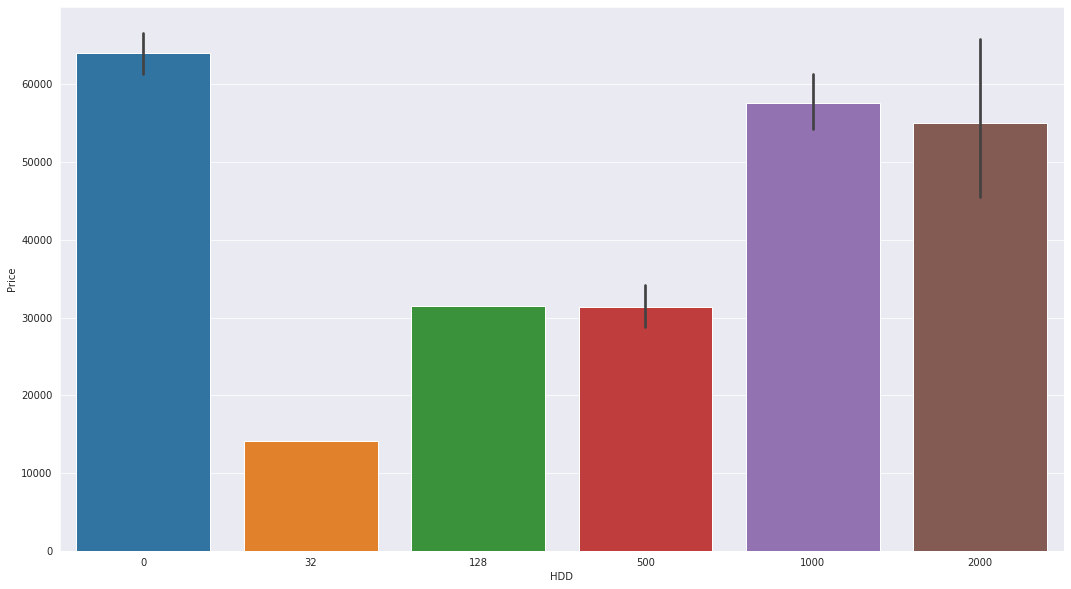

In [325]:
plt.figure(figsize = (18,10))
sns.barplot(y = df["Price"], x = df["HDD"])
plt.show()

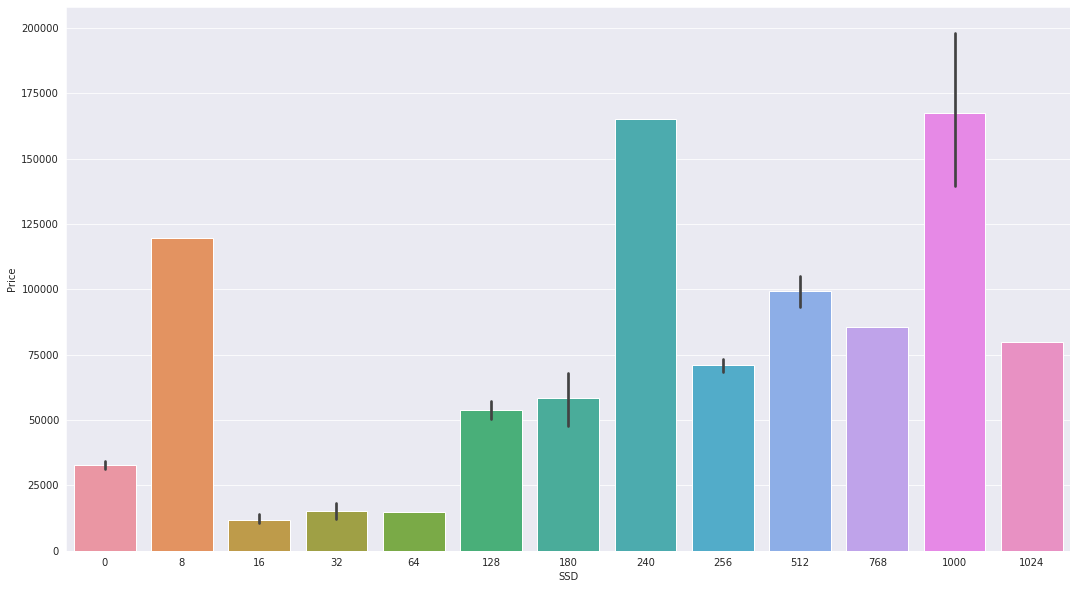

In [323]:
plt.figure(figsize = (18,10))
sns.barplot(y = df["Price"], x = df["SSD"])
plt.show()

In [252]:
df.head(10)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,touchscreen,Ips,ppi,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256
5,Acer,Notebook,4,AMD Radeon R5,Windows 10,2.10,21312.0000,0,0,100.454670,AMD Processor,500,0
6,Apple,Ultrabook,16,Intel Iris Pro Graphics,Mac OS X,2.04,114017.6016,0,1,220.534624,Intel Core i7,0,0
7,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,61735.5360,0,0,127.677940,Intel Core i5,0,0
8,Asus,Ultrabook,16,Nvidia GeForce MX150,Windows 10,1.30,79653.6000,0,0,157.350512,Intel Core i7,0,512
9,Acer,Ultrabook,8,Intel UHD Graphics 620,Windows 10,1.60,41025.6000,0,1,157.350512,Intel Core i5,0,256


Let's split the GPU Column into GPU Brands.

In [253]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [254]:
df['Gpu brand']  = df['Gpu'].apply(lambda x:x.split()[0])

In [255]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [256]:
df = df[df['Gpu brand'] != 'ARM']

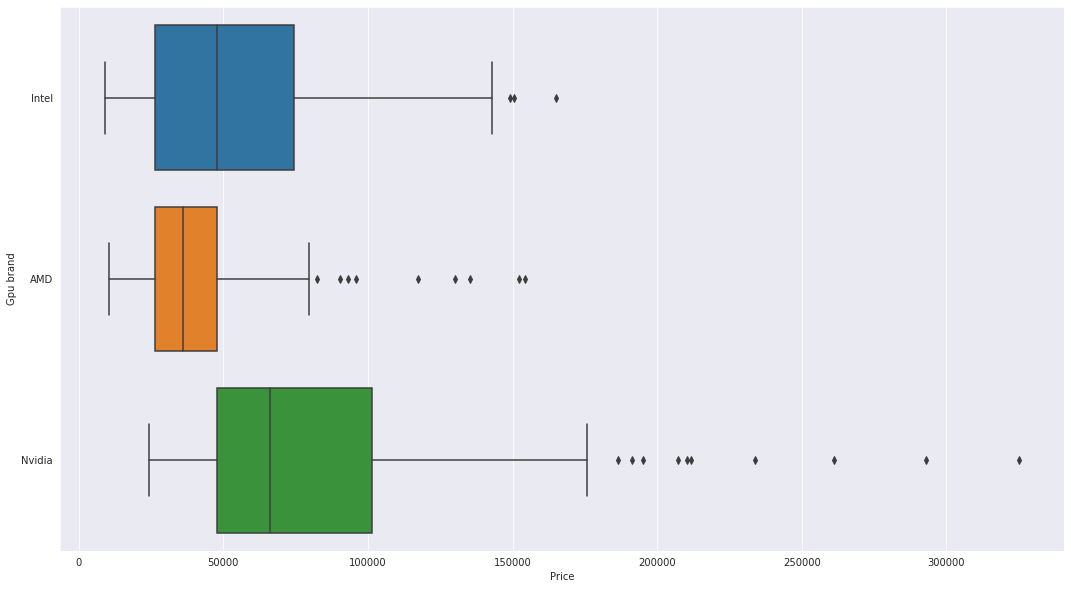

In [257]:
plt.figure(figsize = (18,10))
sns.boxplot(x = df["Price"], y = df["Gpu brand"])
plt.show()

In [258]:
df.drop(columns=['Gpu'],inplace=True)

Let's create a new Column called OS to split the OpSys into 3 categories.

In [259]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [260]:
def cat_os(os):
    if os == 'Windows 10' or os == 'Windows 7' or os == 'Windows 10 S':
        return 'Windows'
    elif os == 'Mac OS X' or os == 'macOS':
        return 'Mac'
    else:
        return 'others/NO OS/Linux'
df['OS'] = df['OpSys'].apply(cat_os)

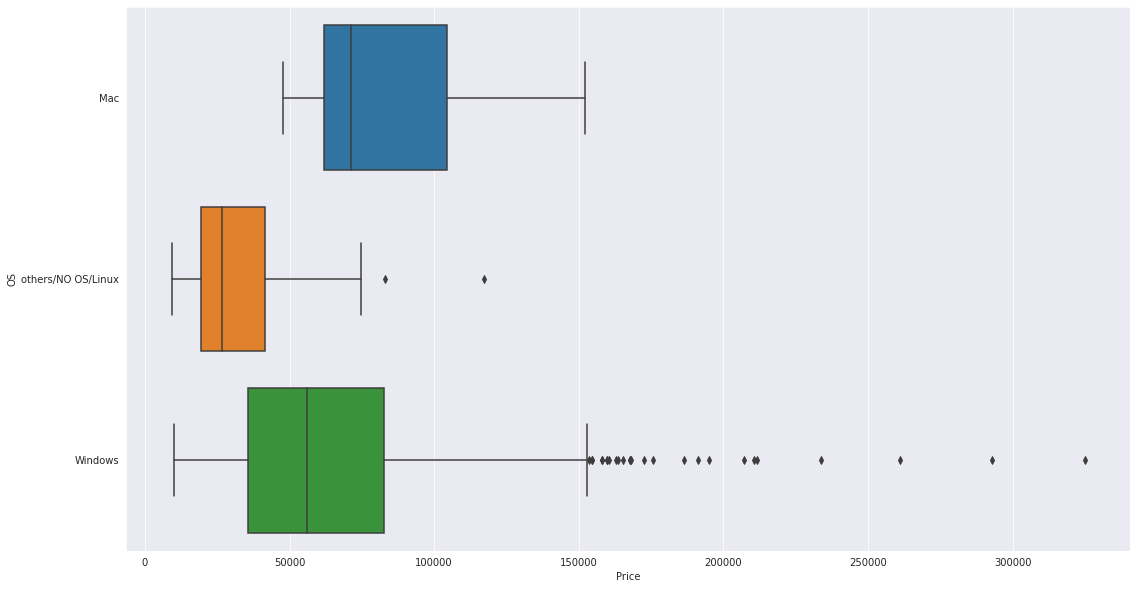

In [261]:
plt.figure(figsize = (18,10))
sns.boxplot(x = df["Price"], y = df["OS"])
plt.show()

In [262]:
df.drop(columns = 'OpSys', inplace = True)

In [263]:
df.head(10)

,Company,TypeName,Ram,Weight,Price,touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,others/NO OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
5,Acer,Notebook,4,2.10,21312.0000,0,0,100.454670,AMD Processor,500,0,AMD,Windows
6,Apple,Ultrabook,16,2.04,114017.6016,0,1,220.534624,Intel Core i7,0,0,Intel,Mac
7,Apple,Ultrabook,8,1.34,61735.5360,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
8,Asus,Ultrabook,16,1.30,79653.6000,0,0,157.350512,Intel Core i7,0,512,Nvidia,Windows
9,Acer,Ultrabook,8,1.60,41025.6000,0,1,157.350512,Intel Core i5,0,256,Intel,Windows


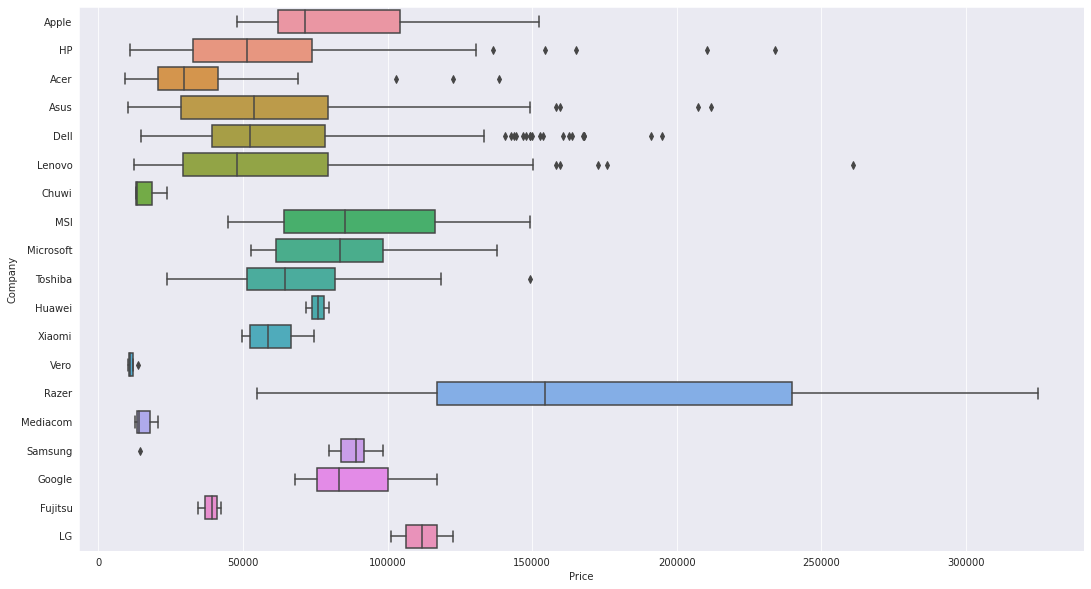

In [264]:
plt.figure(figsize = (18,10))
sns.boxplot(x = df["Price"], y = df["Company"])
plt.show()

In [265]:
df_dummy = pd.get_dummies(df, columns = ['Company', 'TypeName', 'Cpu brand', 'Gpu brand', 'OS'])
df = df.merge(df_dummy, left_index = False, right_index = False)

df = df.drop(columns = ['Company', 'TypeName', 'Cpu brand', 'Gpu brand', 'OS'])
print("Shapes of model database: ", df.shape)

Shapes of model database:  (1410, 44)


In [266]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1410 entries, 0 to 1409
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ram                              1410 non-null   int32  
 1   Weight                           1410 non-null   float32
 2   Price                            1410 non-null   float64
 3   touchscreen                      1410 non-null   int64  
 4   Ips                              1410 non-null   int64  
 5   ppi                              1410 non-null   float64
 6   HDD                              1410 non-null   int64  
 7   SSD                              1410 non-null   int64  
 8   Company_Acer                     1410 non-null   uint8  
 9   Company_Apple                    1410 non-null   uint8  
 10  Company_Asus                     1410 non-null   uint8  
 11  Company_Chuwi                    1410 non-null   uint8  
 12  Company_Dell        

In [267]:
df.head()

,Ram,Weight,Price,touchscreen,Ips,ppi,HDD,SSD,Company_Acer,Company_Apple,...,Cpu brand_Intel Core i3,Cpu brand_Intel Core i5,Cpu brand_Intel Core i7,Cpu brand_Other Intel Processor,Gpu brand_AMD,Gpu brand_Intel,Gpu brand_Nvidia,OS_Mac,OS_Windows,OS_others/NO OS/Linux
0,8,1.37,71378.6832,0,1,226.983005,0,128,0,1,...,0,1,0,0,0,1,0,1,0,0
1,8,1.34,47895.5232,0,0,127.677940,0,0,0,1,...,0,1,0,0,0,1,0,1,0,0
2,8,1.86,30636.0000,0,0,141.211998,0,256,0,0,...,0,1,0,0,0,1,0,0,0,1
3,16,1.83,135195.3360,0,1,220.534624,0,512,0,1,...,0,0,1,0,1,0,0,1,0,0
4,8,1.37,96095.8080,0,1,226.983005,0,256,0,1,...,0,1,0,0,0,1,0,1,0,0


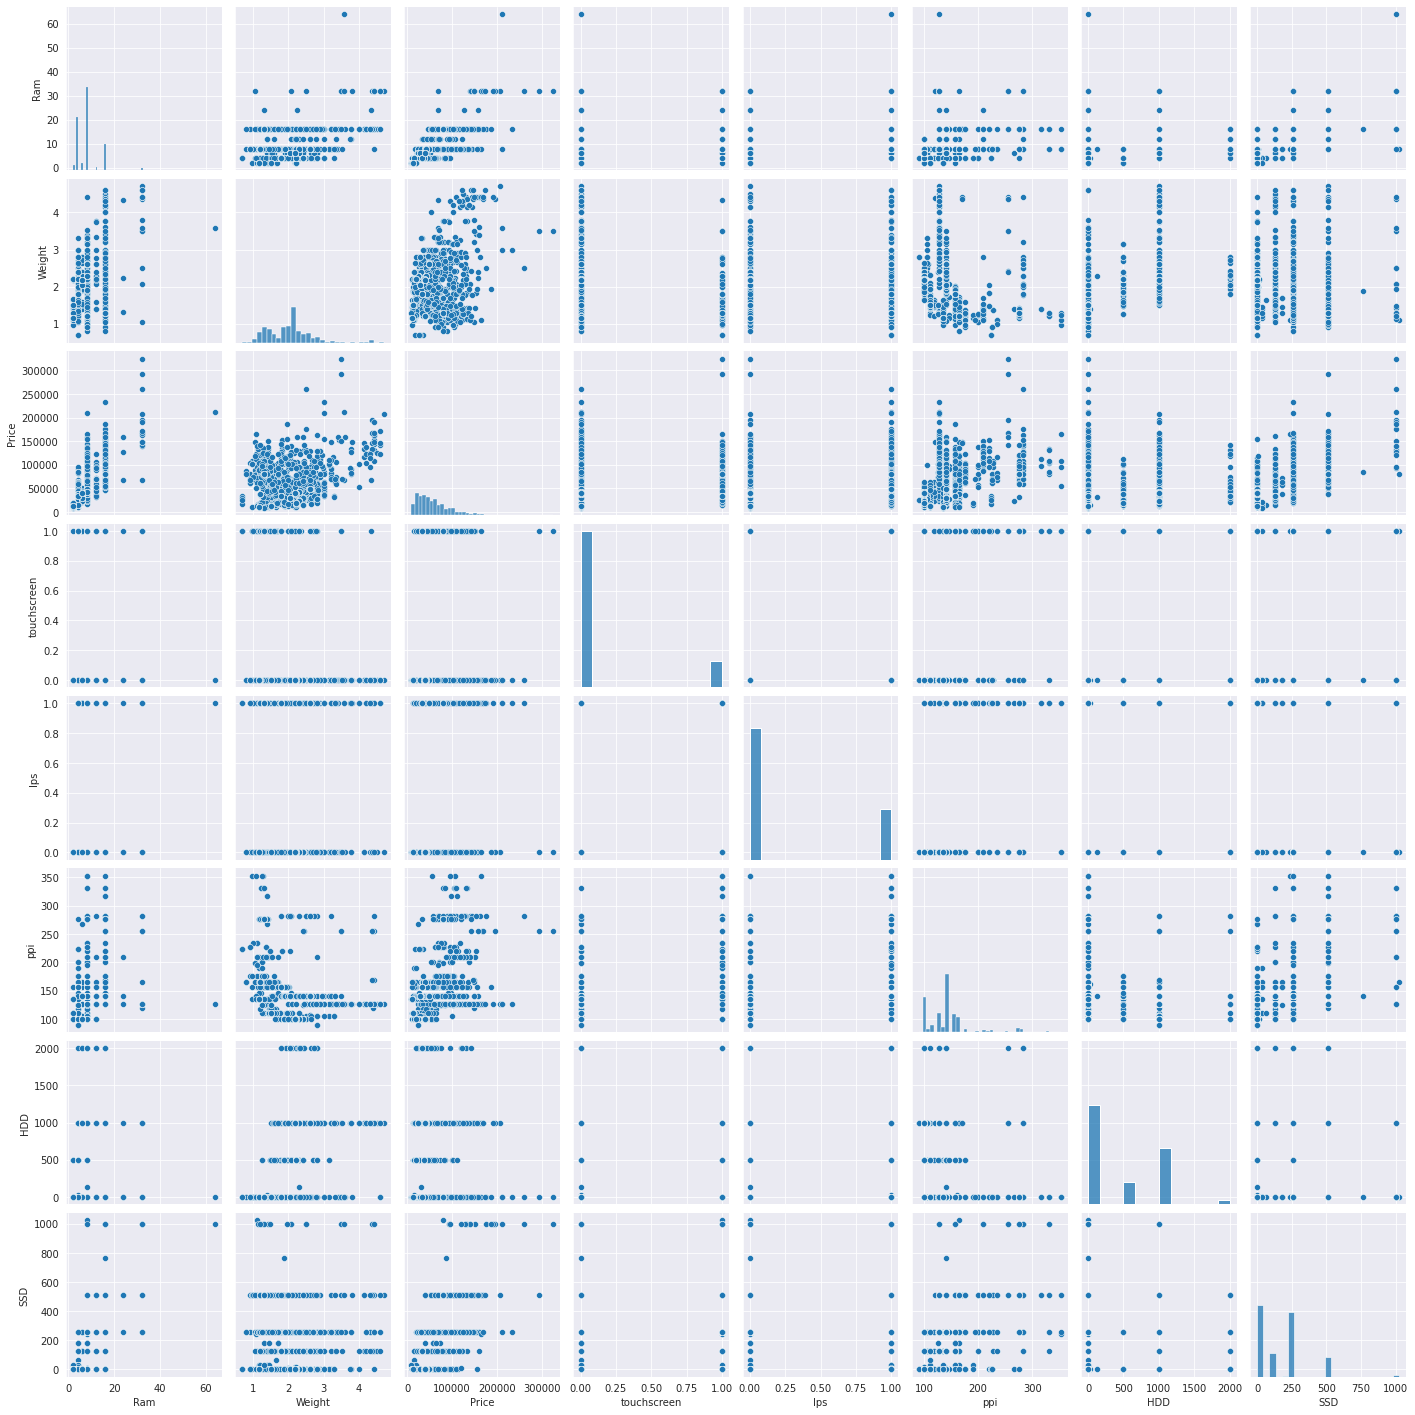

In [268]:
sns.pairplot(df[df.columns[0:8]])

Let's create our test, train, and validation.

In [271]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['Price']).values
y = df.Price.values

from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(np.expand_dims(y,axis=1))

In [272]:
from torch.utils.data import Dataset
#Buat class dataset sendiri
class AutosDataset(Dataset):
  def __init__(self, X, y):
    self.X = X
    self.y = y

  def __getitem__(self, index):
    X = torch.Tensor(self.X[index])
    y = torch.Tensor(self.y[index])
    
    return X, y

  def __len__(self):
    return len(self.X)

In [309]:
#80 train, 10 val, 10 test
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2) #80,10,10
train_X, valid_X, train_y, valid_y = train_test_split(train_X, train_y, test_size=0.5) 

from torch.utils.data import DataLoader

train_ds = AutosDataset(train_X, train_y)
train_loader = DataLoader(train_ds, batch_size=16, shuffle=True, num_workers=0)

valid_ds = AutosDataset(valid_X, valid_y)
valid_loader = DataLoader(valid_ds, batch_size=16, shuffle=False, num_workers=0)

test_ds = AutosDataset(test_X, test_y)
test_loader = DataLoader(test_ds, batch_size=16, shuffle=False, num_workers=0)

In [310]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [348]:
class Net(nn.Module):
    # define nn
    def __init__(self):
        super(Net, self).__init__()
        #Input Layer
        self.fc1 = nn.Linear(43, 86) #in_feature, out_feature 
        #Hidden Layer
        self.fc2 = nn.Linear(86, 86) #hidden layer 1
        #output layer
        self.fc3 = nn.Linear(86, 1)

    def forward(self, X):
        X = self.fc1(X)
        X = F.relu(X)
        X = self.fc2(X)
        X = F.relu(X)
        X = self.fc3(X)
        X = F.relu(X)

        return X

In [349]:
net = Net()

criterion = nn.MSELoss()

optimizer = torch.optim.SGD(net.parameters(), lr=0.05)

In [350]:
epochs = 300
 
train_mean_losses = []
valid_mean_losses = []

valid_best_loss = np.inf

for i in range(epochs):    
    train_losses = []
    valid_losses = []
    
    print("==============================================================")
    print("Epoch {}".format(i))
    
    for iteration, batch_data in enumerate(train_loader):
        X_batch, y_batch = batch_data
        
        optimizer.zero_grad()
        
        out = net(X_batch)
        loss = criterion(out, y_batch.squeeze())
        
        loss.backward()
        optimizer.step()
        
        train_losses.append(loss)
    
    train_mean_loss = torch.mean(torch.stack(train_losses))
    print('training loss: {:10.8f}'.format(train_mean_loss))
    
    train_mean_losses.append(train_mean_loss)
        
    with torch.set_grad_enabled(False):
        for iteration, batch_data in enumerate(valid_loader):
            X_batch, y_batch = batch_data

            out = net(X_batch)
            loss = criterion(out, y_batch.squeeze())
            valid_losses.append(loss)
            
        valid_mean_loss = torch.mean(torch.stack(valid_losses))
        print('validation loss: {:10.8f}'.format(valid_mean_loss))
        
        valid_mean_losses.append(valid_mean_loss)
        
        if valid_mean_loss.cpu().numpy()[()] < valid_best_loss:
            valid_best_loss = valid_mean_loss
            torch.save(net.state_dict(), "best_model.pth")
            

Epoch 0
training loss: 0.91159797
validation loss: 1.03306818
Epoch 1
training loss: 0.90738243


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([4, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


validation loss: 1.03306437
Epoch 2
training loss: 0.89058757
validation loss: 1.03305888
Epoch 3
training loss: 0.89885318
validation loss: 1.03305888
Epoch 4
training loss: 0.89585614
validation loss: 1.03305888
Epoch 5
training loss: 1.01843119
validation loss: 1.03305888
Epoch 6
training loss: 0.90086627
validation loss: 1.03305888
Epoch 7
training loss: 0.90598828
validation loss: 1.03305888
Epoch 8
training loss: 0.89534420
validation loss: 1.03305888
Epoch 9
training loss: 0.89531612
validation loss: 1.03305888
Epoch 10
training loss: 0.90138179
validation loss: 1.03305888
Epoch 11
training loss: 0.91677314
validation loss: 1.03305888
Epoch 12
training loss: 0.89479148
validation loss: 1.03305888
Epoch 13
training loss: 0.90051055
validation loss: 1.03305888
Epoch 14
training loss: 0.88984466
validation loss: 1.03305888
Epoch 15
training loss: 0.90707374
validation loss: 1.03305888
Epoch 16
training loss: 0.89653802
validation loss: 1.03305888
Epoch 17
training loss: 0.89152634


In [351]:
from sklearn.metrics import mean_squared_error
test_pred = np.empty((0,1))
with torch.no_grad():
    for iteration, batch_data in enumerate(test_loader):
        X_batch, y_batch = batch_data        
        out = net(X_batch)
        
        test_pred = np.append(test_pred, 
                                     out.numpy(), axis=0)
        
test_pred = np.array(test_pred)
test_pred = scaler_y.inverse_transform(test_pred)

test_gt = scaler_y.inverse_transform(test_y)

mse_base = round(mean_squared_error(test_gt, test_pred), 3)
print("Base Model MSE: ", mse_base)

Base Model MSE:  1525987151.14


Modified Model

In [358]:
class Net(nn.Module):
    # define nn
    def __init__(self):
        super(Net, self).__init__()
        #Input Layer
        self.fc1 = nn.Linear(43, 86) #in_feature, out_feature 
        #Hidden Layer
        self.fc2 = nn.Linear(86, 43) #hidden layer 1
        self.drop = nn.Dropout(0.5)
        #output layer
        self.fc3 = nn.Linear(43, 1)

    def forward(self, X):
        X = self.fc1(X)
        X = F.relu(X)
        X = self.fc2(X)
        X = F.relu(X)
        X = self.drop(X)
        X = self.fc3(X)
        X = F.relu(X)

        return X

In [359]:
net1 = Net()

criterion = nn.MSELoss()

optimizer = torch.optim.SGD(net.parameters(), lr=0.05)

In [360]:
epochs = 300
 
train_mean_losses = []
valid_mean_losses = []

valid_best_loss = np.inf

for i in range(epochs):    
    train_losses = []
    valid_losses = []
    
    print("==============================================================")
    print("Epoch {}".format(i))
    
    for iteration, batch_data in enumerate(train_loader):
        X_batch, y_batch = batch_data
        
        optimizer.zero_grad()
        
        out = net1(X_batch)
        loss = criterion(out, y_batch.squeeze())
        
        loss.backward()
        optimizer.step()
        
        train_losses.append(loss)
    
    train_mean_loss = torch.mean(torch.stack(train_losses))
    print('training loss: {:10.8f}'.format(train_mean_loss))
    
    train_mean_losses.append(train_mean_loss)
        
    with torch.set_grad_enabled(False):
        for iteration, batch_data in enumerate(valid_loader):
            X_batch, y_batch = batch_data

            out = net1(X_batch)
            loss = criterion(out, y_batch.squeeze())
            valid_losses.append(loss)
            
        valid_mean_loss = torch.mean(torch.stack(valid_losses))
        print('validation loss: {:10.8f}'.format(valid_mean_loss))
        
        valid_mean_losses.append(valid_mean_loss)
        
        if valid_mean_loss.cpu().numpy()[()] < valid_best_loss:
            valid_best_loss = valid_mean_loss
            torch.save(net1.state_dict(), "best_model.pth")
            

Epoch 0
training loss: 0.89551002
validation loss: 1.03175223
Epoch 1


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([4, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


training loss: 0.89327121
validation loss: 1.03342509
Epoch 2
training loss: 0.89572197
validation loss: 1.03469574
Epoch 3
training loss: 0.89927876
validation loss: 1.03290665
Epoch 4
training loss: 0.90330833
validation loss: 1.03566062
Epoch 5
training loss: 0.91468430
validation loss: 1.03590918
Epoch 6
training loss: 0.89257073
validation loss: 1.03433692
Epoch 7
training loss: 0.90796471
validation loss: 1.03223765
Epoch 8
training loss: 0.90036869
validation loss: 1.03474379
Epoch 9
training loss: 0.90398300
validation loss: 1.03364372
Epoch 10
training loss: 0.91400313
validation loss: 1.03287578
Epoch 11
training loss: 0.89638627
validation loss: 1.03561425
Epoch 12
training loss: 0.90158123
validation loss: 1.03260791
Epoch 13
training loss: 0.89962935
validation loss: 1.03314269
Epoch 14
training loss: 0.89985752
validation loss: 1.03389728
Epoch 15
training loss: 0.89516002
validation loss: 1.03540170
Epoch 16
training loss: 0.91496360
validation loss: 1.03501272
Epoch 17


In [361]:
from sklearn.metrics import mean_squared_error
test_pred = np.empty((0,1))
with torch.no_grad():
    for iteration, batch_data in enumerate(test_loader):
        X_batch, y_batch = batch_data        
        out = net1(X_batch)
        
        test_pred = np.append(test_pred, 
                                     out.numpy(), axis=0)
        
test_pred = np.array(test_pred)
test_pred = scaler_y.inverse_transform(test_pred)

test_gt = scaler_y.inverse_transform(test_y)

mse_final = round(mean_squared_error(test_gt, test_pred), 3)
print("Final Model MSE: ", mse_final)

Final Model MSE:  1488315980.942
